## Hidden Layer Deep Network: Sigmoid, Tanh and Relu Activations Functions MNIST Dataset

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [2]:
# Create the model class using sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

In [3]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [4]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:02, 4302433.05it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136600.50it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 1805124.85it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 43193.55it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [7]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [9]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [10]:
# Set the parameters for create the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

In [11]:
# Set the number of iterations

cust_epochs = 10

In [12]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [13]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [14]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

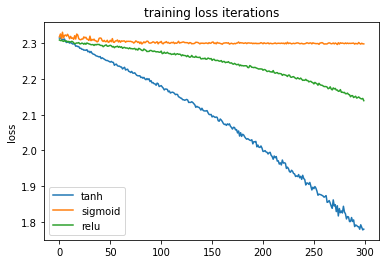

In [15]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

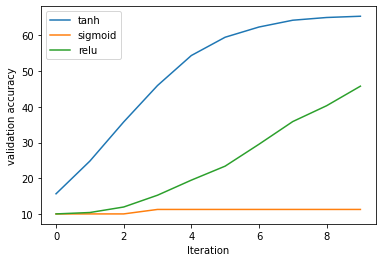

In [16]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()